# Preventive Maintenance Data Analysis and Modeling

This notebook covers data exploration, feature engineering, modeling (logistic regression, decision tree, random forest), and evaluation for the AI4I 2020 dataset.

## 1. Data Loading and Cleaning

In [18]:
import pandas as pd
import numpy as np

# Load dataset
dataset = pd.read_csv('./ai4i2020.csv')

# Replace '?' with NaN and drop missing values
dataset = dataset.replace('?', np.nan)
dataset = dataset.dropna()

## 2. Data Exploration

In [19]:
# Basic info
display(dataset.head())
display(dataset.info())
display(dataset.describe())

# Class balance
print('Class balance (machine failure):')
print(dataset['Machine failure'].value_counts())

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,0,0,0,0,0
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,0,0,0,0,0
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,0,0,0,0,0
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,0,0,0,0,0
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,0,0,0,0,0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   UDI                      10000 non-null  int64  
 1   Product ID               10000 non-null  object 
 2   Type                     10000 non-null  object 
 3   Air temperature [K]      10000 non-null  float64
 4   Process temperature [K]  10000 non-null  float64
 5   Rotational speed [rpm]   10000 non-null  int64  
 6   Torque [Nm]              10000 non-null  float64
 7   Tool wear [min]          10000 non-null  int64  
 8   Machine failure          10000 non-null  int64  
 9   TWF                      10000 non-null  int64  
 10  HDF                      10000 non-null  int64  
 11  PWF                      10000 non-null  int64  
 12  OSF                      10000 non-null  int64  
 13  RNF                      10000 non-null  int64  
dtypes: float64(3), int64(9)

None

,UDI,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000
mean,5000.50000,300.004930,310.005560,1538.776100,39.986910,107.951000,0.033900,0.004600,0.011500,0.009500,0.009800,0.00190
std,2886.89568,2.000259,1.483734,179.284096,9.968934,63.654147,0.180981,0.067671,0.106625,0.097009,0.098514,0.04355
min,1.00000,295.300000,305.700000,1168.000000,3.800000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
25%,2500.75000,298.300000,308.800000,1423.000000,33.200000,53.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
50%,5000.50000,300.100000,310.100000,1503.000000,40.100000,108.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
75%,7500.25000,301.500000,311.100000,1612.000000,46.800000,162.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
max,10000.00000,304.500000,313.800000,2886.000000,76.600000,253.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000


Class balance (machine failure):
Machine failure
0    9661
1     339
Name: count, dtype: int64


## 3. Feature Engineering

In [20]:
# Drop UID
dataset = dataset.drop(columns=['UDI'])

# Extract product quality from Product ID
dataset['Product Quality'] = dataset['Type'].str[0]
dataset = dataset.drop(columns=['Product ID'])
dataset = dataset.drop(columns=['Type'])

# One-hot encode product quality
dataset = pd.get_dummies(dataset, columns=['Product Quality'])

# Check for other non-numeric columns
non_numeric_cols = dataset.select_dtypes(include=['object', 'category']).columns
print('Other non-numeric columns:', list(non_numeric_cols))

Other non-numeric columns: []


## 4. Correlation Matrix

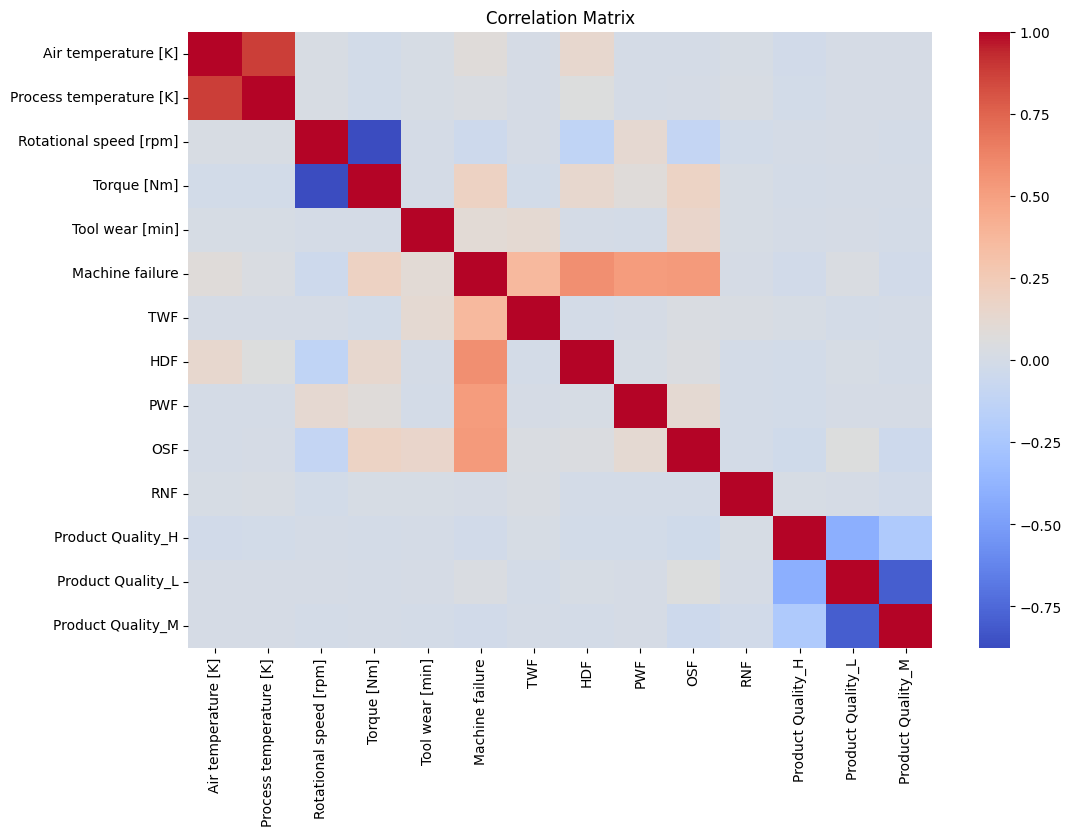

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12,8))
sns.heatmap(dataset.corr(), annot=False, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

## 5. Prepare Features and Target

In [23]:
# Select features (drop all failure columns except 'Machine failure')
failure_cols = ['TWF', 'HDF', 'PWF', 'OSF', 'RNF', 'Machine failure']
X = dataset.drop(columns=failure_cols)
y = dataset['Machine failure']

## 6. Train/Test Split

In [24]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0, stratify=y)

## 7. Feature Scaling

In [25]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## 8. Modeling and Evaluation

In [26]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score

# Logistic Regression
logreg = LogisticRegression(class_weight='balanced', random_state=0, max_iter=500)
logreg.fit(X_train_scaled, y_train)
y_pred_logreg = logreg.predict(X_test_scaled)

# Decision Tree
dtree = DecisionTreeClassifier(class_weight='balanced', random_state=0)
dtree.fit(X_train, y_train)
y_pred_dtree = dtree.predict(X_test)

# Random Forest
rf = RandomForestClassifier(class_weight='balanced', random_state=0)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

## 9. Evaluation Metrics

,Failure Type,Model,Precision_0,Recall_0,F1_0,Precision_1,Recall_1,F1_1,ROC-AUC
0,TWF,Logistic Regression,1.000000,0.921647,0.959226,0.054545,1.000000,0.103448,0.960824
1,TWF,Decision Tree,0.995489,0.997489,0.996488,0.000000,0.000000,0.000000,0.498744
2,TWF,Random Forest,0.995500,1.000000,0.997745,0.000000,0.000000,0.000000,0.500000
3,HDF,Logistic Regression,1.000000,0.977744,0.988747,0.343284,1.000000,0.511111,0.988872
4,HDF,Decision Tree,0.999494,0.999494,0.999494,0.956522,0.956522,0.956522,0.978008
5,HDF,Random Forest,0.994967,1.000000,0.997477,1.000000,0.565217,0.722222,0.782609
6,PWF,Logistic Regression,1.000000,0.976275,0.987995,0.287879,1.000000,0.447059,0.988137
7,PWF,Decision Tree,0.999494,0.996971,0.998231,0.750000,0.947368,0.837209,0.972170
8,PWF,Random Forest,0.997480,0.998990,0.998235,0.875000,0.736842,0.800000,0.867916
9,OSF,Logistic Regression,1.000000,0.991919,0.995943,0.555556,1.000000,0.714286,0.995960


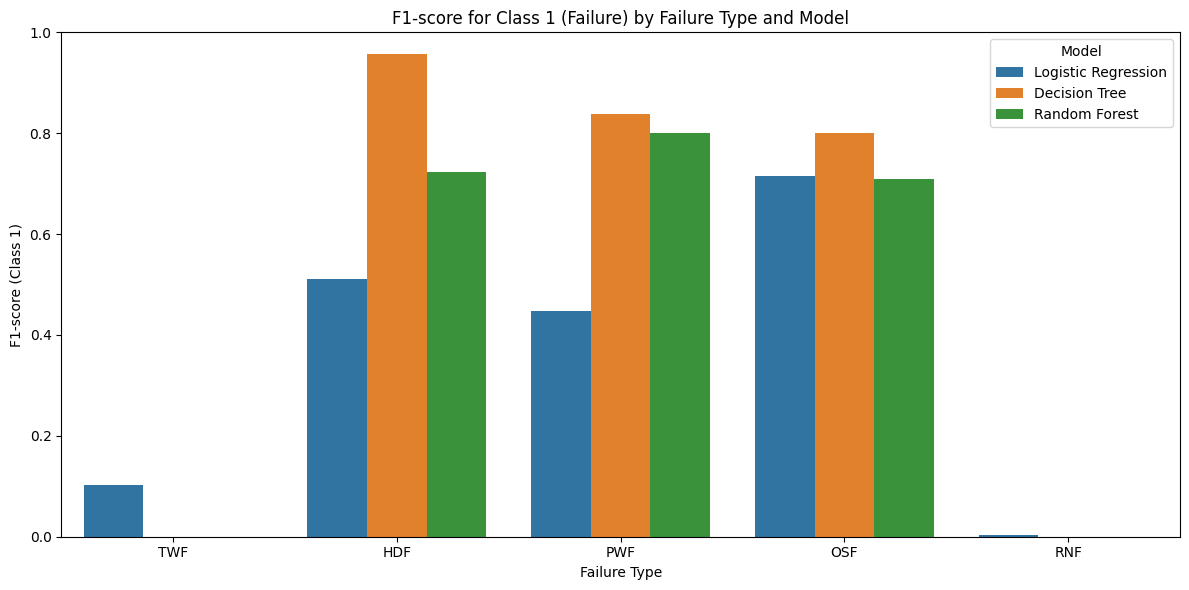

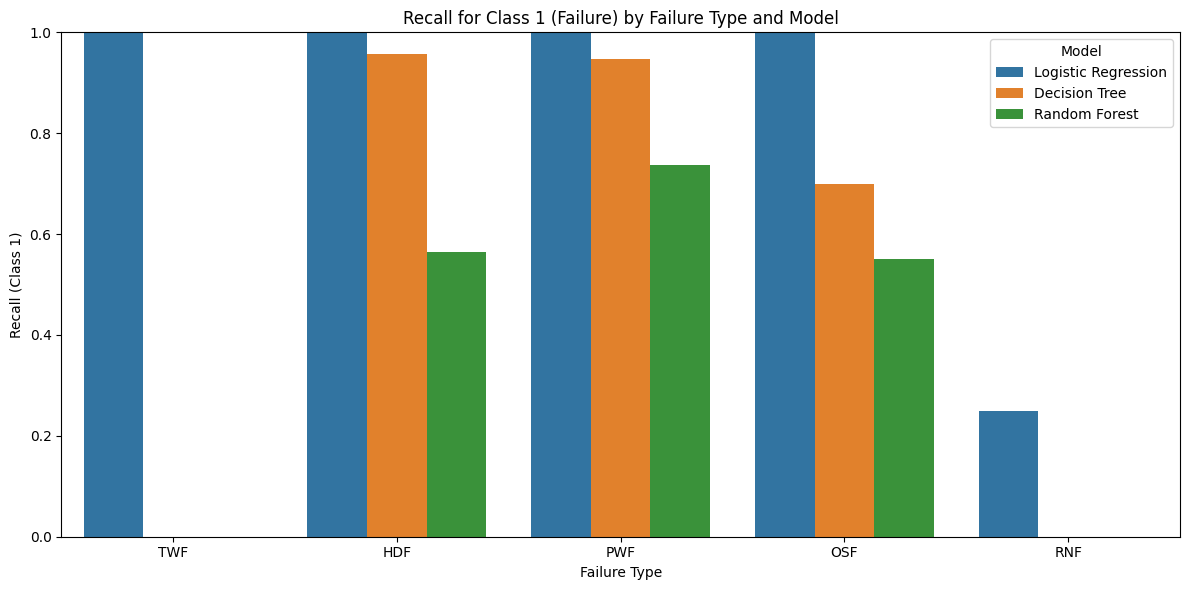

In [28]:
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score

failure_types = ['TWF', 'HDF', 'PWF', 'OSF', 'RNF']
model_classes = {
    'Logistic Regression': LogisticRegression(class_weight='balanced', random_state=0, max_iter=500),
    'Decision Tree': DecisionTreeClassifier(class_weight='balanced', random_state=0),
    'Random Forest': RandomForestClassifier(class_weight='balanced', random_state=0)
}

summary_rows = []

for failure in failure_types:
    # Prepare features and target for this failure type
    X_ft = dataset.drop(columns=failure_types + ['Machine failure'])
    y_ft = dataset[failure]
    X_train, X_test, y_train, y_test = train_test_split(X_ft, y_ft, test_size=0.2, random_state=0, stratify=y_ft)
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    for model_name, model in model_classes.items():
        if model_name == 'Logistic Regression':
            model.fit(X_train_scaled, y_train)
            y_pred = model.predict(X_test_scaled)
        else:
            model.fit(X_train, y_train)
            y_pred = model.predict(X_test)
        precision_0 = precision_score(y_test, y_pred, pos_label=0, zero_division=0)
        recall_0 = recall_score(y_test, y_pred, pos_label=0, zero_division=0)
        f1_0 = f1_score(y_test, y_pred, pos_label=0, zero_division=0)
        precision_1 = precision_score(y_test, y_pred, pos_label=1, zero_division=0)
        recall_1 = recall_score(y_test, y_pred, pos_label=1, zero_division=0)
        f1_1 = f1_score(y_test, y_pred, pos_label=1, zero_division=0)
        roc_auc = roc_auc_score(y_test, y_pred)
        summary_rows.append({
            'Failure Type': failure,
            'Model': model_name,
            'Precision_0': precision_0,
            'Recall_0': recall_0,
            'F1_0': f1_0,
            'Precision_1': precision_1,
            'Recall_1': recall_1,
            'F1_1': f1_1,
            'ROC-AUC': roc_auc
        })

summary_df = pd.DataFrame(summary_rows)
display(summary_df)

import matplotlib.pyplot as plt
import seaborn as sns

# Visualize F1-score for class 1 by failure type and model
plt.figure(figsize=(12, 6))
sns.barplot(
    data=summary_df,
    x='Failure Type',
    y='F1_1',
    hue='Model'
)
plt.title('F1-score for Class 1 (Failure) by Failure Type and Model')
plt.ylabel('F1-score (Class 1)')
plt.ylim(0, 1)
plt.legend(title='Model')
plt.tight_layout()
plt.show()

# Visualize Recall for class 1 by failure type and model
plt.figure(figsize=(12, 6))
sns.barplot(
    data=summary_df,
    x='Failure Type',
    y='Recall_1',
    hue='Model'
)
plt.title('Recall for Class 1 (Failure) by Failure Type and Model')
plt.ylabel('Recall (Class 1)')
plt.ylim(0, 1)
plt.legend(title='Model')
plt.tight_layout()
plt.show()